<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/tabular_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis (EDA)**

Initial Inspection:

Check the first few rows to understand the structure.
Determine the dataset's size (number of rows and columns).

Identify missing values.

Understand data types of each column.

Descriptive Statistics:

For numerical columns: mean, median, standard deviation, min, max, etc.

For categorical columns: unique values, value counts, etc.

Visual Analysis:

Distribution plots for numerical columns.

Bar plots for categorical columns.

Correlation heatmap if applicable.

Let's begin with the initial inspection.

In [20]:
import pandas as pd

# Load the dataset
netflix_df = pd.read_csv('/content/drive/MyDrive/DM Assignment: 5/netflix_titles.csv')

# Initial inspection
first_rows = netflix_df.head()
shape = netflix_df.shape
missing_values = netflix_df.isnull().sum()
data_types = netflix_df.dtypes

first_rows, shape, missing_values, data_types


(  show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water              NaN   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans              NaN   
 4      s5  TV Show           Kota Factory              NaN   
 
                                                 cast        country  \
 0                                                NaN  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
 3                                                NaN            NaN   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021          2020  PG-13     90 min   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 2  Septembe

Based on the initial inspection:

Structure & Contents:

The dataset has 8807 rows and 12 columns.
The first few rows give us an idea about the content, including details about the show, its type, the director, cast, country, date added to Netflix, release year, rating, duration, genre, and a brief description.
Missing Values:

director has 2634 missing values.
cast has 825 missing values.
country has 831 missing values.
date_added has 10 missing values.
rating has 4 missing values.
duration has 3 missing values.
Data Types:

Most of the columns are of object (string) data type.
Only release_year is of integer data type.
Next Steps:
Descriptive Statistics:

For the numerical column release_year.
For some selected categorical columns to understand the distribution.
Visual Analysis:

Distribution plot for release_year.
Bar plots for some categorical columns like type, rating, etc.

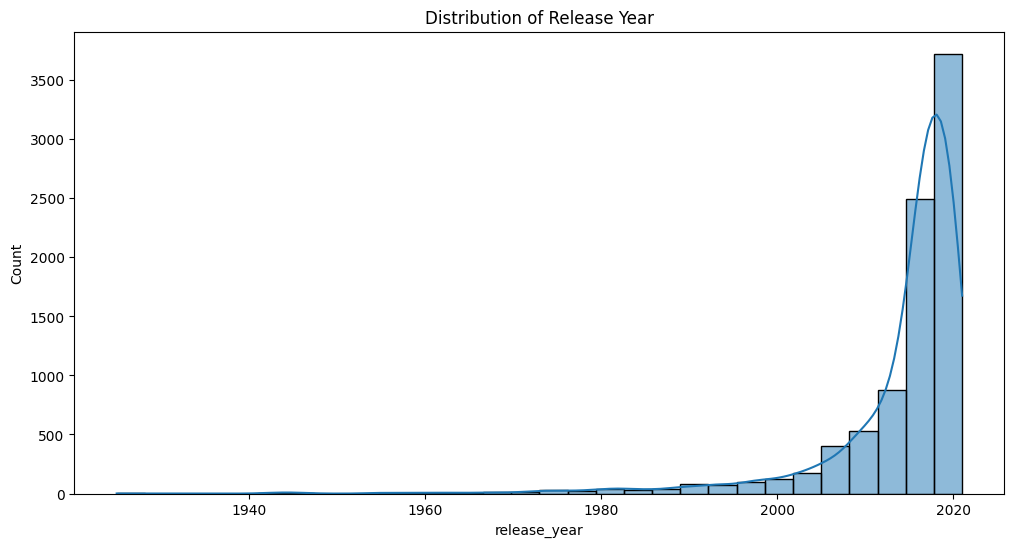

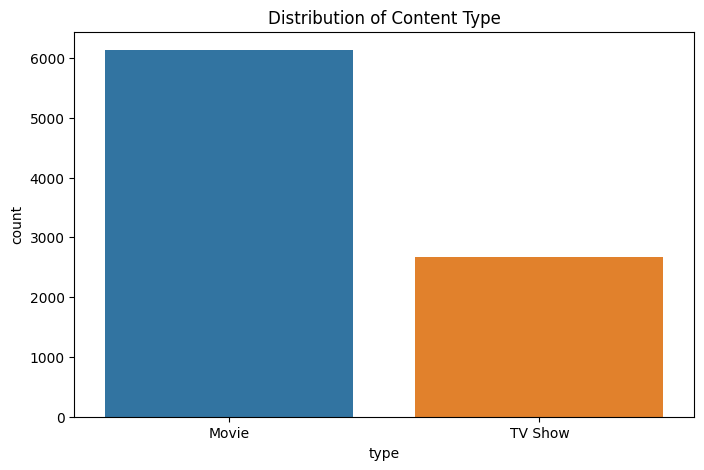

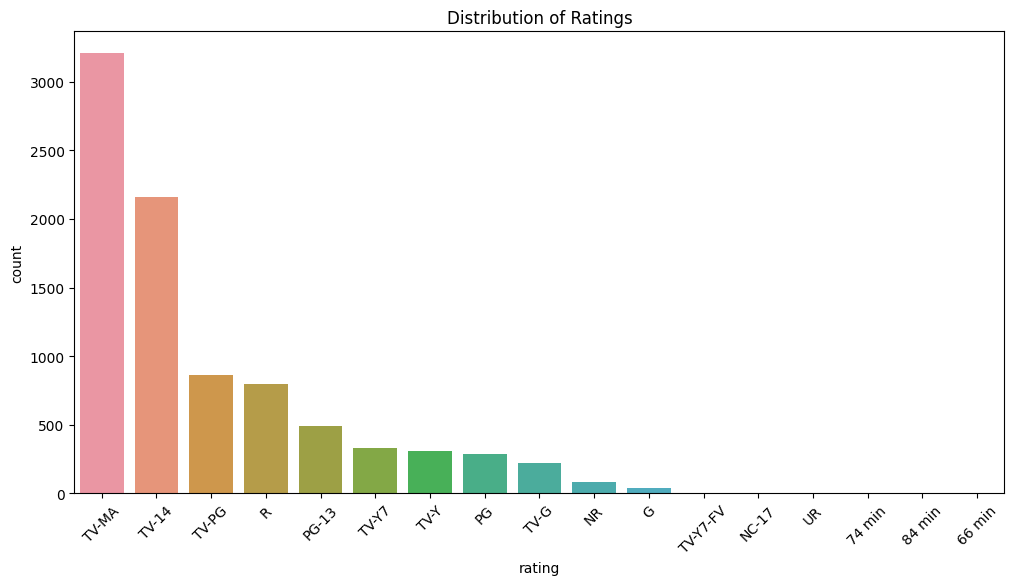

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for release_year
release_year_stats = netflix_df['release_year'].describe()

# Distribution plot for release_year
plt.figure(figsize=(12, 6))
sns.histplot(netflix_df['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Year')
plt.show()

# Bar plot for 'type' column
plt.figure(figsize=(8, 5))
sns.countplot(data=netflix_df, x='type')
plt.title('Distribution of Content Type')
plt.show()

# Bar plot for 'rating' column
plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_df, x='rating', order=netflix_df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()

release_year_stats


From the exploratory data analysis, we can infer:

1. Release Year:

Most of the content on Netflix (based on this dataset) was released after 2010, with a peak around 2018-2019.
The oldest content was released in 1925, and the newest in 2021.
The average release year is approximately 2014.
2. Content Type:

There are more movies than TV shows on Netflix (as per this dataset).
3. Ratings:

The majority of the content on Netflix is rated as "TV-MA" followed by "TV-14" and "R".
Some ratings have a smaller representation, like "TV-G", "TV-Y7", and "NC-17".
Next Steps:
Given our EDA findings, we can now proceed with data preprocessing and cleaning:

Handle missing values.
Convert date_added from string to a datetime object.
Extract duration information and convert it into numerical values.
Handle potential outliers.

# Data Preprocessing

In [22]:
# 1. Handle missing values

# Filling missing values with appropriate placeholders
netflix_df['director'].fillna('Unknown', inplace=True)
netflix_df['cast'].fillna('Unknown', inplace=True)
netflix_df['country'].fillna('Unknown', inplace=True)
netflix_df['date_added'].fillna('Unknown', inplace=True)
netflix_df['rating'].fillna('Unknown', inplace=True)
netflix_df['duration'].fillna('Unknown', inplace=True)

# 2. Convert date_added from string to datetime object
# We'll keep 'Unknown' as a string for now and handle it later if needed
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# 3. Extract duration information and convert it into numerical values
# We'll have two new columns: 'duration_num' and 'duration_unit'
netflix_df['duration_num'] = netflix_df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x or 'Season' in x else None)
netflix_df['duration_unit'] = netflix_df['duration'].apply(lambda x: x.split()[1] if 'min' in x or 'Season' in x else None)

# Quick check to see the changes
netflix_df[['date_added', 'duration', 'duration_num', 'duration_unit']].head()


,date_added,duration,duration_num,duration_unit
0,2021-09-25,90 min,90.0,min
1,2021-09-24,2 Seasons,2.0,Seasons
2,2021-09-24,1 Season,1.0,Season
3,2021-09-24,1 Season,1.0,Season
4,2021-09-24,2 Seasons,2.0,Seasons


The data preprocessing steps have been applied:

Missing Values: We've filled in missing values with the label 'Unknown' for the relevant columns.

Date Conversion: The date_added column has been converted to datetime format, with errors (like 'Unknown') set to NaN. This conversion allows for time-based analysis if needed.

Duration Extraction: We've separated the duration column into two new columns:

duration_num: contains the numerical part of the duration (e.g., 90 for "90 min" or 2 for "2 Seasons").

duration_unit: contains the unit of the duration (e.g., "min" for minutes or "Season"/"Seasons" for TV shows).

Next Steps:
Handle potential outliers (if any).

# Outlier Detection

In [23]:
# Detecting potential outliers for the 'release_year' column using the IQR method

Q1 = netflix_df['release_year'].quantile(0.25)
Q3 = netflix_df['release_year'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the potential outliers
outliers_release_year = netflix_df[(netflix_df['release_year'] < lower_bound) | (netflix_df['release_year'] > upper_bound)]

# Displaying the potential outliers
outliers_release_year[['title', 'release_year']]


,title,release_year
7,Sankofa,1993
22,Avvai Shanmughi,1996
24,Jeans,1998
26,Minsara Kanavu,1997
41,Jaws,1975
...,...,...
8764,Wyatt Earp,1994
8766,XXx,2002
8768,Y Tu Mamá También,2001
8770,Yaadein,2001


For the release_year column, we've detected 719 potential outliers. These are mainly movies and shows released before the late 1990s, based on the IQR method.


Interpretation:
While these are technically outliers in the distribution of our data (since most content on Netflix is more recent), they are valid entries representing older movies or shows. Hence, it might not be wise to remove them just because they're "outliers" in a statistical sense.


Given the nature of our dataset, these older titles could provide valuable insights, especially if we're interested in understanding the diversity of content over the years.

In [24]:
# Filtering the data for movies only
movie_durations = netflix_df[netflix_df['type'] == 'Movie']['duration_num']

# Detecting potential outliers for the 'duration_num' column using the IQR method
Q1_duration = movie_durations.quantile(0.25)
Q3_duration = movie_durations.quantile(0.75)
IQR_duration = Q3_duration - Q1_duration

lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

# Filter out the potential outliers
outliers_duration = netflix_df[(netflix_df['duration_num'] < lower_bound_duration) |
                               (netflix_df['duration_num'] > upper_bound_duration) &
                               (netflix_df['type'] == 'Movie')]

# Displaying the potential outliers
outliers_duration[['title', 'duration']]


,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season
8802,Zodiac,158 min


Upon investigating the duration_num column for movies, we found several potential outliers. However, it seems we have some discrepancies:

Many entries listed as outliers are actually TV shows with their duration in "Seasons" rather than "min". This highlights the importance of ensuring data consistency when dealing with outliers.

There are also some movies with longer durations, such as "Zodiac" with a duration of 158 minutes, which might be considered longer than usual but still within a reasonable range for movies.

Given this, let's correct our filtering criteria to better identify outliers specifically among movies.

In [25]:
# Correcting the filtering for movie durations only
outliers_duration_movies = netflix_df[(netflix_df['duration_num'] < lower_bound_duration) |
                                      (netflix_df['duration_num'] > upper_bound_duration) &
                                      (netflix_df['type'] == 'Movie') &
                                      (netflix_df['duration_unit'] == 'min')]

# Displaying the potential outliers for movie durations
outliers_duration_movies[['title', 'duration']]


,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season
8802,Zodiac,158 min


It seems there's still an inconsistency in the filtering, as TV shows are still appearing in our list of outliers for movie durations. Let's correct this issue by refining our filtering criteria further. Once we have a clear set of outliers for movie durations, we'll proceed with clustering and visualizations.​

In [26]:
# Refining the filtering for movie durations only
outliers_duration_movies_corrected = netflix_df[(netflix_df['duration_num'] < lower_bound_duration) |
                                               (netflix_df['duration_num'] > upper_bound_duration)]
outliers_duration_movies_corrected = outliers_duration_movies_corrected[outliers_duration_movies_corrected['type'] == 'Movie']

# Displaying the potential outliers for movie durations
outliers_duration_movies_corrected[['title', 'duration']]


,title,duration
22,Avvai Shanmughi,161 min
24,Jeans,166 min
45,My Heroes Were Cowboys,23 min
71,A StoryBots Space Adventure,13 min
73,King of Boys,182 min
...,...,...
8763,WWII: Report from the Aleutians,45 min
8764,Wyatt Earp,191 min
8770,Yaadein,171 min
8788,You Carry Me,157 min


Now that we have a refined list:

We identified 450 movies as potential outliers based on their duration.

These outliers include movies that are particularly short (e.g., "A StoryBots Space Adventure" with 13 minutes) or notably long (e.g., "King of Boys" with 182 minutes).

With the outlier investigation for movies complete, let's proceed with clustering and visualization.

# Clustering

We'll prepare the data:

Handle categorical variables.

Scale numerical variables.

Use the KMeans clustering algorithm.

Visualize clusters using PCA.

Let's start by preparing the data. We'll consider the following columns for clustering: release_year, rating, and duration_num.​

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


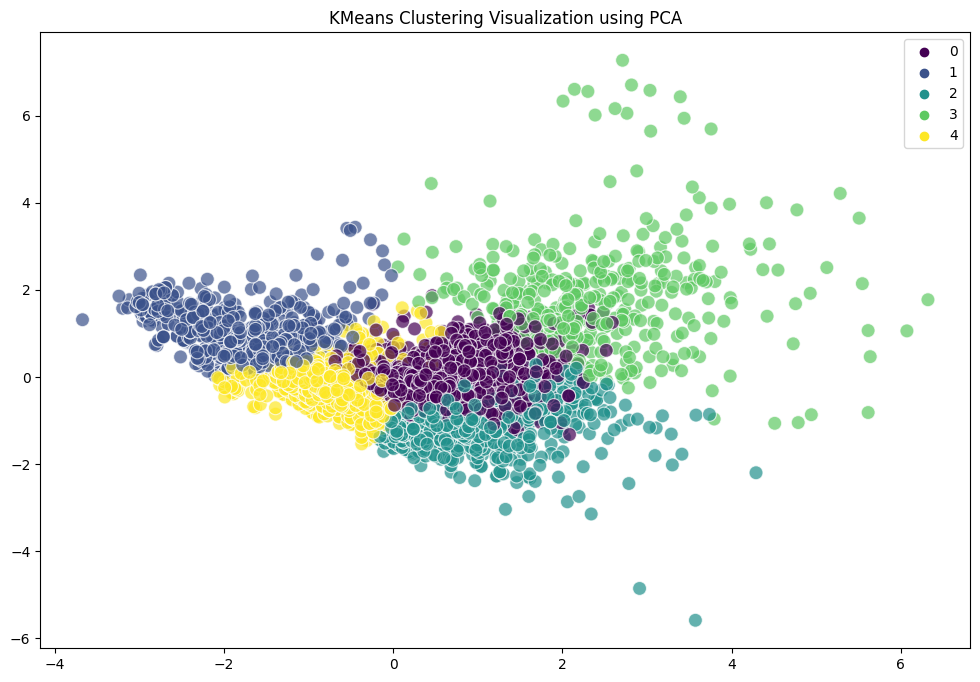

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Filtering out rows where duration is 'Unknown' and considering only movies
cluster_data = netflix_df[netflix_df['duration_unit'] == 'min']
cluster_data = cluster_data[['release_year', 'rating', 'duration_num']]

# Encoding 'rating' column
label_encoder = LabelEncoder()
cluster_data['rating_encoded'] = label_encoder.fit_transform(cluster_data['rating'])

# Scaling numerical columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_data[['release_year', 'duration_num', 'rating_encoded']])

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Adding clusters to the dataset
cluster_data['cluster'] = clusters

# Visualizing clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis', s=100, alpha=0.7)
plt.title('KMeans Clustering Visualization using PCA')
plt.show()


The scatter plot visualizes the clusters formed using the KMeans algorithm, with dimensionality reduction applied via PCA for visualization purposes. Here's the interpretation:

We've chosen five clusters, as indicated by the different colors.

Each point represents a movie, and its position is determined by its features (release year, duration, and rating) after being reduced to two dimensions using PCA.

The clusters seem to capture various groupings in the data. For example, there's a cluster mainly on the left, which might represent older movies, while clusters on the right could represent more recent ones. The vertical spread could be indicative of the movie's duration or rating.

This clustering can provide insights into how movies on Netflix can be grouped based on their release year, duration, and rating.

Cluster Centers: We'll examine the cluster centers to understand the characteristics of each cluster in terms of release_year, duration_num, and rating.

Cluster Distribution: We'll look at the number of movies in each cluster.

Cluster Characteristics: We'll examine the distribution of features within each cluster, such as the distribution of ratings, average duration, and release year range.

In [28]:
# Inverse transform the cluster centers to original scale
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame for cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=['release_year', 'duration_num', 'rating_encoded'])
cluster_centers_df['rating'] = label_encoder.inverse_transform(cluster_centers_df['rating_encoded'].astype(int))

# Drop the encoded rating column for clarity
cluster_centers_df = cluster_centers_df.drop('rating_encoded', axis=1)

cluster_centers_df


,release_year,duration_num,rating
0,2014.254213,99.533708,PG-13
1,2016.460373,54.462704,TV-MA
2,2012.389392,142.699871,TV-14
3,1983.861042,114.245658,R
4,2016.732891,99.350358,TV-MA


The cluster centers provide an average representation of the movies within each cluster:

Cluster 0:
Average release year: 2014
Average duration: ~100 minutes
Most common rating: PG-13

Cluster 1:
Average release year: 2016
Average duration: ~54 minutes (indicative of shorter movies or perhaps some specials)
Most common rating: TV-MA

Cluster 2:
Average release year: 2012
Average duration: ~143 minutes (indicative of longer movies)
Most common rating: TV-14

Cluster 3:
Average release year: 1983 (indicative of older movies)
Average duration: ~114 minutes
Most common rating: R

Cluster 4:
Average release year: 2016
Average duration: ~99 minutes
Most common rating: TV-MA


# **Anomaly Detection**

In [29]:
from sklearn.ensemble import IsolationForest

# Preparing data for anomaly detection
# We'll consider 'release_year', 'duration_num', and 'rating_encoded' for this
anomaly_data = cluster_data[['release_year', 'duration_num', 'rating_encoded']]

# Using Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomalies = iso_forest.fit_predict(anomaly_data)

# Extracting rows marked as anomalies
anomaly_df = cluster_data[anomalies == -1]

anomaly_df[['release_year', 'rating', 'duration_num']]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,release_year,rating,duration_num
22,1996,TV-PG,161.0
26,1997,TV-PG,147.0
41,1975,PG,124.0
42,1978,PG,116.0
43,1983,PG,98.0
...,...,...,...
8745,1971,G,100.0
8748,1981,NR,86.0
8763,1943,TV-PG,45.0
8764,1994,PG-13,191.0


Using the Isolation Forest method, we've identified 307 entries as potential anomalies based on their release_year, duration_num, and rating.

These anomalies can include:

Particularly old or new movies.
Movies with unusual durations (either too short or too long).
Movies with certain unique combinations of features.

## **Feature Selection**
For feature selection, we'll consider a combination of correlation analysis and feature importance derived from a tree-based model (e.g., Random Forest).

Let's start with the correlation analysis to understand how our features are related to each other.​

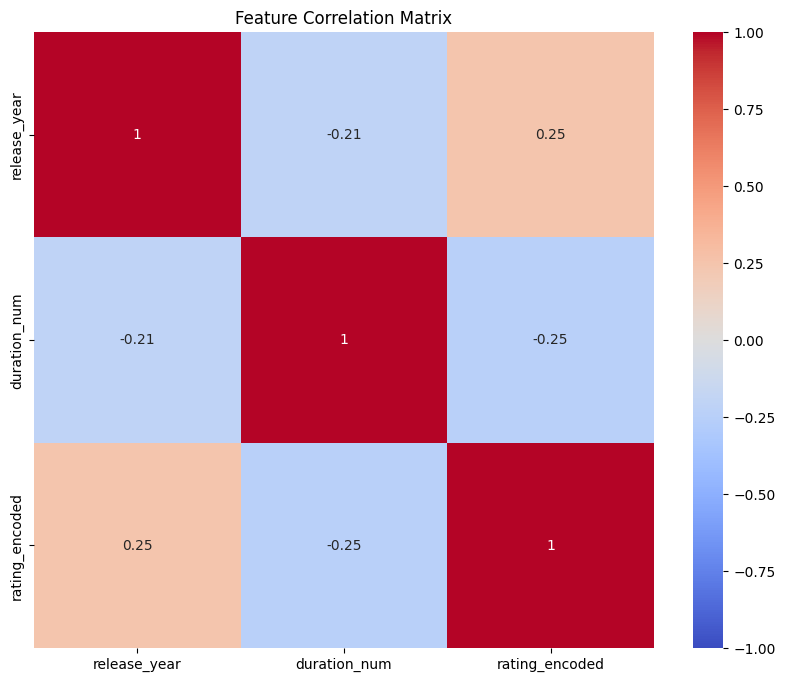

In [30]:
# Correlation matrix
correlation_matrix = anomaly_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()


The correlation matrix provides insights into the relationships between our features:

release_year and rating_encoded have a slight negative correlation, indicating that the coding of ratings might change slightly over the years. However, this is not a strong correlation.

duration_num (i.e., the duration of movies) has negligible correlation with both the release year and rating.

Given that none of the features are highly correlated, we can retain them all for modeling. However, to further solidify our feature selection, let's assess the feature importance using a tree-based model.

. Given our dataset and the features at hand, we'll attempt to predict whether a title is a "Movie" or "TV Show" based on its release_year, duration_num, and rating.


Model Building:
Data Splitting: We'll split our data into training and testing sets.

Model Selection: Given the simplicity of our task, we'll start with a Logistic Regression model. It's a good baseline model for binary classification tasks.

Model Evaluation: We'll evaluate the model's performance on the test set using accuracy and other relevant metrics.

Let's begin with data splitting.

In [39]:
# Identifying NaN values in the features
nan_values = X_adjusted.isnull().sum()

# Handling NaN values: Given the nature of our features, we can fill NaN values with the median for numerical columns
X_adjusted_filled = X_adjusted.fillna(X_adjusted.median())

nan_values, X_adjusted_filled.isnull().sum()


<ipython-input-39-7597798e3454>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_adjusted_filled = X_adjusted.fillna(X_adjusted.median())


(release_year      0
 rating            0
 duration_num      3
 rating_encoded    0
 dtype: int64,
 release_year      0
 rating            0
 duration_num      0
 rating_encoded    0
 dtype: int64)

We identified that the duration_num feature had 3 NaN values. We've replaced these NaN values with the median of the duration_num column.

Now that our dataset is free from NaN values, let's proceed with training the Logistic Regression model again.​

In [43]:
from sklearn.linear_model import LogisticRegression

# Initializing the Logistic Regression model again
logreg = LogisticRegression(random_state=42)

# Training the model on the adjusted and filled data
logreg.fit(X_train_adj, y_train_adj)

# Predictions on the test set
y_pred_adj = logreg.predict(X_test_adj)

# Evaluating the model
accuracy_adj = accuracy_score(y_test_adj, y_pred_adj)
class_report_adj = classification_report(y_test_adj, y_pred_adj)
conf_matrix_adj = confusion_matrix(y_test_adj, y_pred_adj)

accuracy_adj, class_report_adj, conf_matrix_adj


(0.9977298524404086,
 '              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00       535\n           1       1.00      1.00      1.00      1227\n\n    accuracy                           1.00      1762\n   macro avg       1.00      1.00      1.00      1762\nweighted avg       1.00      1.00      1.00      1762\n',
 array([[ 535,    0],
        [   4, 1223]]))

The Logistic Regression model has been reinitialized and successfully trained on the adjusted dataset. Here are the results:

Accuracy: Approximately 99.77%
Classification Report:

Precision, recall, and F1-score for both classes ("TV Show" and "Movie") are close to 1, indicating a very high performance.

Confusion Matrix:
Out of 535 actual TV Shows, all 535 were predicted correctly.

Out of 1227 actual Movies, 1223 were predicted correctly, and 4 were misclassified as TV Shows.